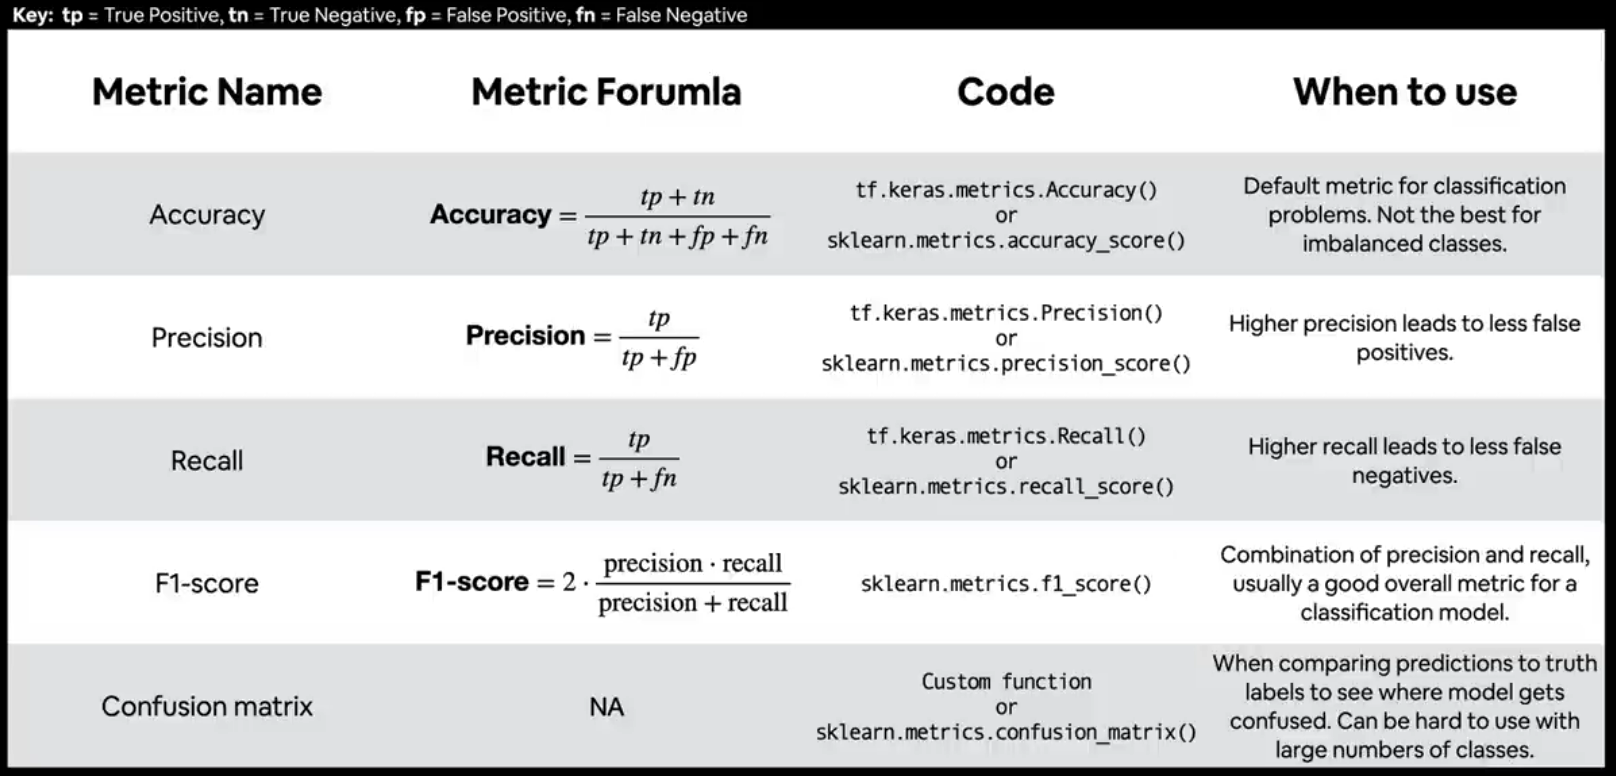

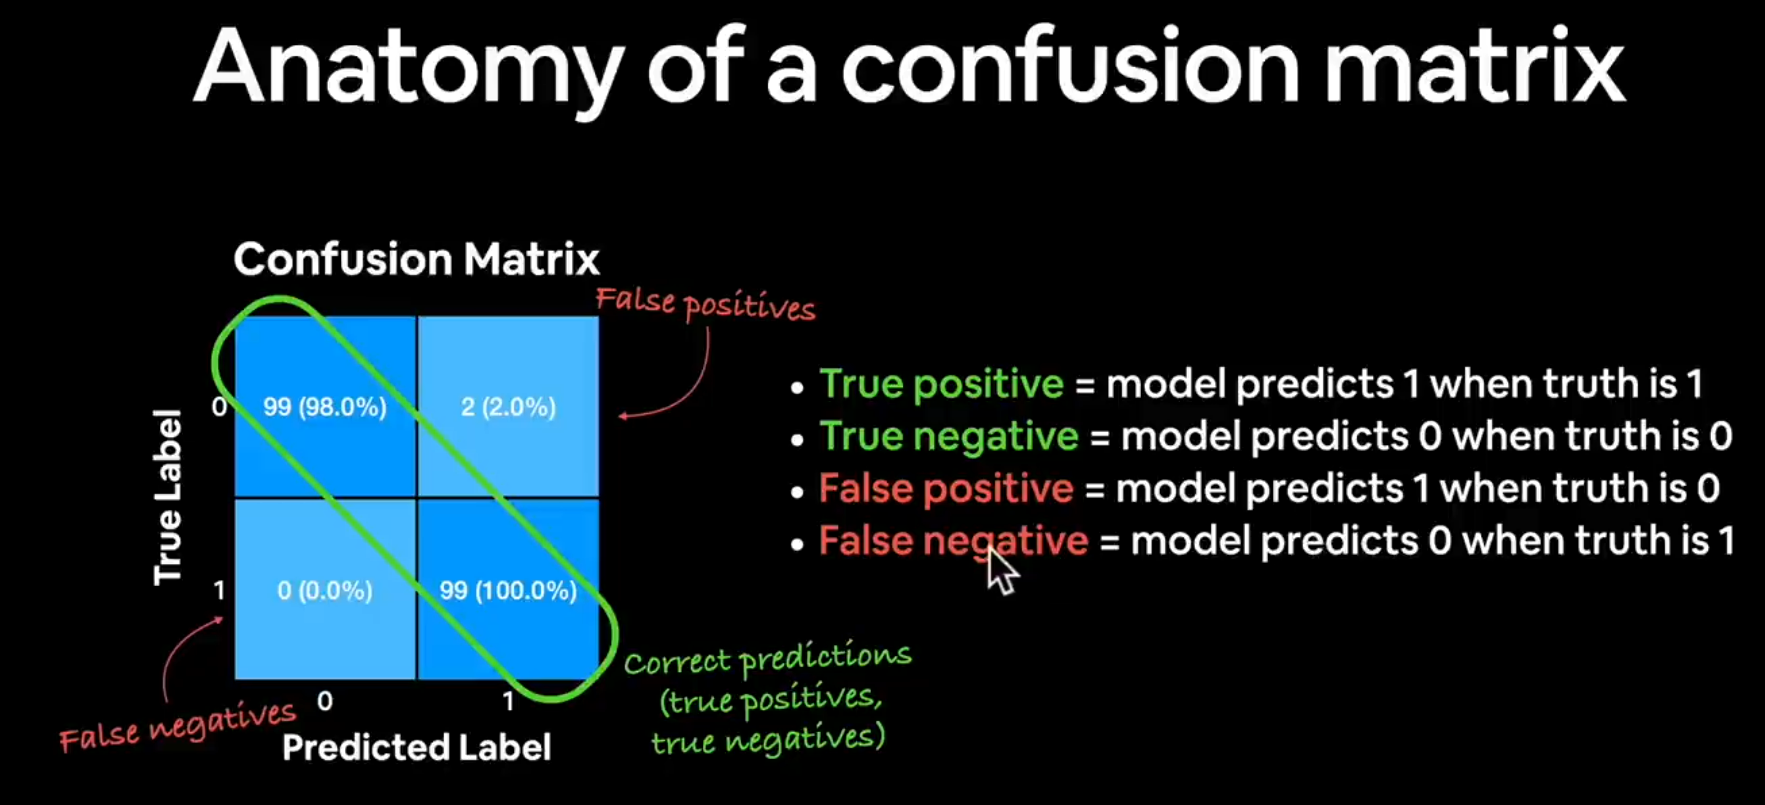

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
import itertools
from sklearn.datasets import *
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [22]:
# Making a data set
SEED = 42
samples = 1000
plt.rcParams["figure.figsize"] = (7,7)
tf.random.set_seed(SEED)
X, Y = make_circles(samples, noise=0.03, random_state=SEED)
test_size = 0.2  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=SEED)


In [23]:
def plot(model, X: np.ndarray, y: np.ndarray):
    x_max, x_min = X[:, 0].max() + 0.1, X[:, 0].min() - 0.1
    y_max, y_min = X[:, 1].max() + 0.1, X[:, 1].min() - 0.1
    print("X max and min: ", x_max, x_min)
    print("Y max and min: ", y_max, y_min)
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    print("Dimension meshgrid: ", xx.shape, yy.shape)
    x_in = np.c_[xx.ravel(), yy.ravel()]
    print("Dimension ravel: ", x_in.shape)
    pred = model.predict(x_in)
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Loss: {loss}\nAccuracy: {accuracy*100:2f}")

    if len(pred[0]) > 1:
        print("Multiclass")
        pred = np.argmax(pred, axis=1).reshape(xx.shape)
    else:
        print("Binary")
        pred = np.round(pred).reshape(xx.shape)

    plt.contourf(xx, yy, pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [24]:
model = keras.Sequential([
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])


c = model.fit(x_train, y_train, 
              epochs=1000, 
              verbose=0
              )

X max and min:  1.1167698425766002 -1.1036527520299177
Y max and min:  1.1351578040814592 -1.094527941956522
Dimension meshgrid:  (100, 100) (100, 100)
Dimension ravel:  (10000, 2)
7/7 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 1.0000
Loss: 0.006189852487295866
Accuracy: 100.000000
Binary


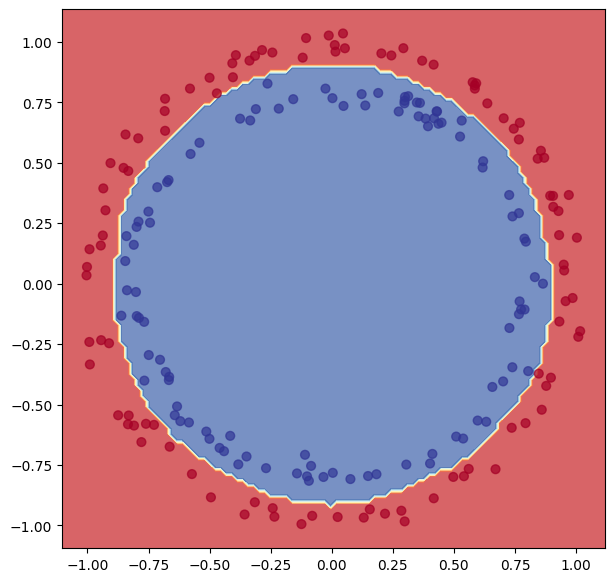

In [25]:
plot(model,x_test,y_test)

In [26]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [28]:
pred = model.predict(x_test)
y_test[:5],pred[:5]

7/7 [==============================] - 0s 4ms/step


(array([1, 0, 1, 0, 1]),
 array([[9.9998856e-01],
        [3.6999737e-03],
        [9.9999213e-01],
        [1.3669701e-04],
        [9.9103057e-01]], dtype=float32))

In [38]:
#convert pred to binary or else ValueError occurs
pred_round = tf.round(pred)
cm = confusion_matrix(y_test,pred_round)
cm

array([[100,   0],
       [  0, 100]])

In [126]:

def plot_conf_mat(cm: np.ndarray, classes: bool = False, figsize: tuple = (7, 7), cmap: plt.cm = plt.cm.Blues):
    cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)

    cax = ax.matshow(cm, cmap=cmap)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(title="Confusion Matrix",
           xlabel="Predicted",
           ylabel="Expected",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    ax.yaxis.label.set_size(10)
    ax.xaxis.label.set_size(10)
    thresh = (cm.max()+cm.min())/2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({round(cm_norm[i,j]*100,2)}%)", horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=figsize[0])

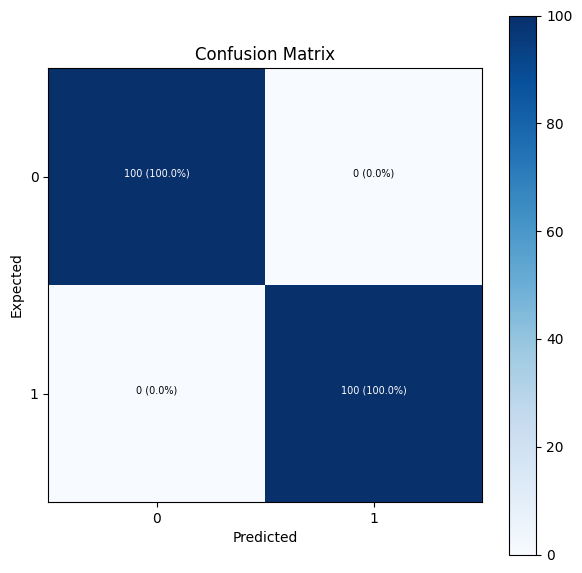

In [128]:
plot_conf_mat(cm)